In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Let's use the "Diabetes" dataset again and apply the feature importance approach using Random Forests to interpret the importance of features. We'll use scikit-learn to build a Random Forest CLassifier and extract the feature importances.

In [10]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes(scaled=False)
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target 

# binarizing the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [12]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7191011235955056


## Feature Importance in Random Forest

The feature importance in Random Forest, is computed by averaging the feature importance for the $i$ th feature across all the $T$ trees in the forest:

$F_i^{Forest} = \frac{\sum_{j=1}^{T} F_i^j}{T}$

The feature importance $F_i$ can be normalized to a value between 0 and 1 by dividing it by the sum of all feature importances across all $P$ features:

$\hat{F}_i^{Forest} = \frac{F_i^{Forest}}{\sum_{k=1}^P F_k^{Forest}}$

In [16]:
# Retrieve the feature importances and feature names
importances = model.feature_importances_
feature_names = diabetes_data.feature_names

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

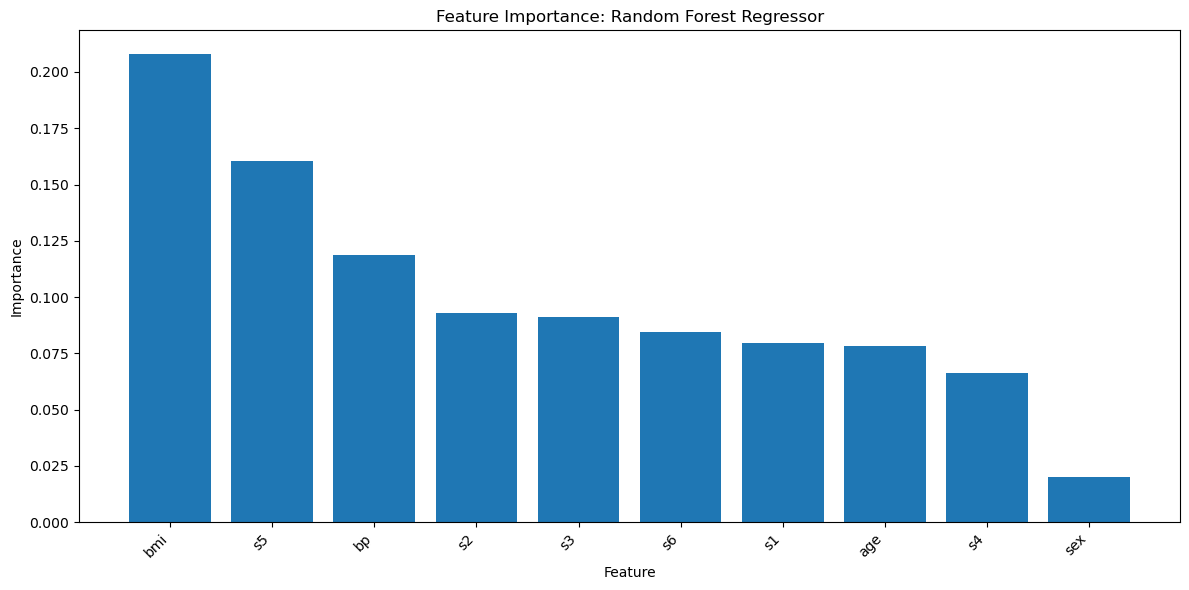

In [18]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest Regressor')
plt.tight_layout()
plt.show()



**Exercise 6:** Try different random states when defining the model. How does it affect the final feature importance results?

**Exercise 7:** Research on potential problems with impurity-based feature importance methods in random forest and decision tree.

### Exercise 6

In [38]:
# Change random state (43)
random_state = 43

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [40]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [42]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7865168539325843


In [44]:
# Retrieve the feature importances and feature names
importances = model.feature_importances_
feature_names = diabetes_data.feature_names

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

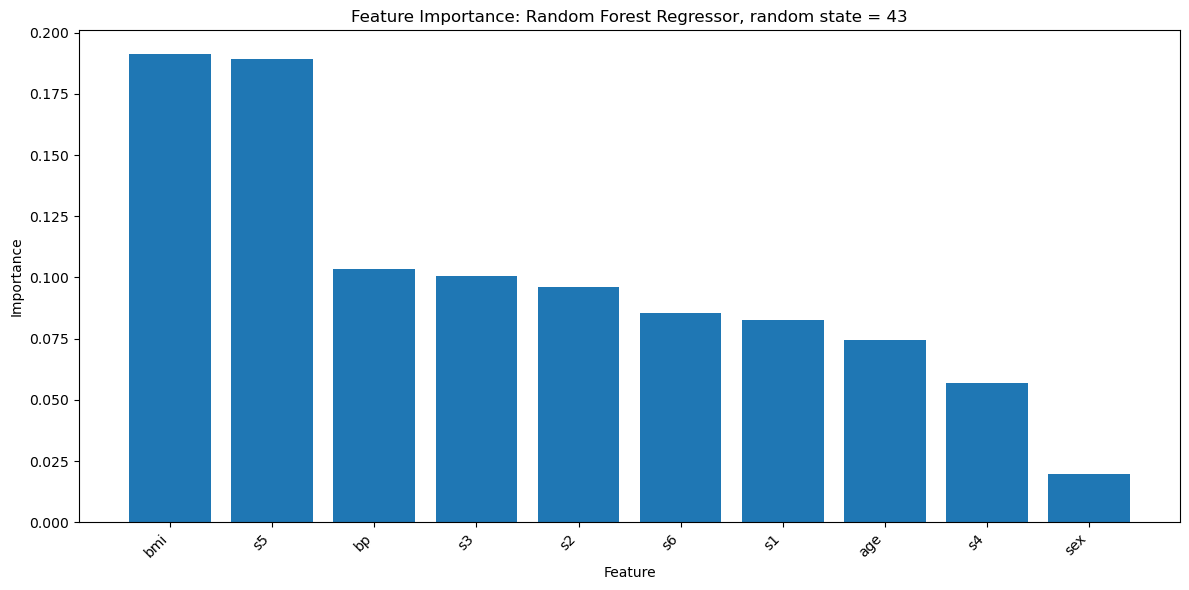

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest Regressor, random state = 43')
plt.tight_layout()
plt.show()


In [48]:
# Change random state (43)
random_state = 44

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [50]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [52]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7415730337078652


In [54]:
# Retrieve the feature importances and feature names
importances = model.feature_importances_
feature_names = diabetes_data.feature_names

# Create a DataFrame to store the importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

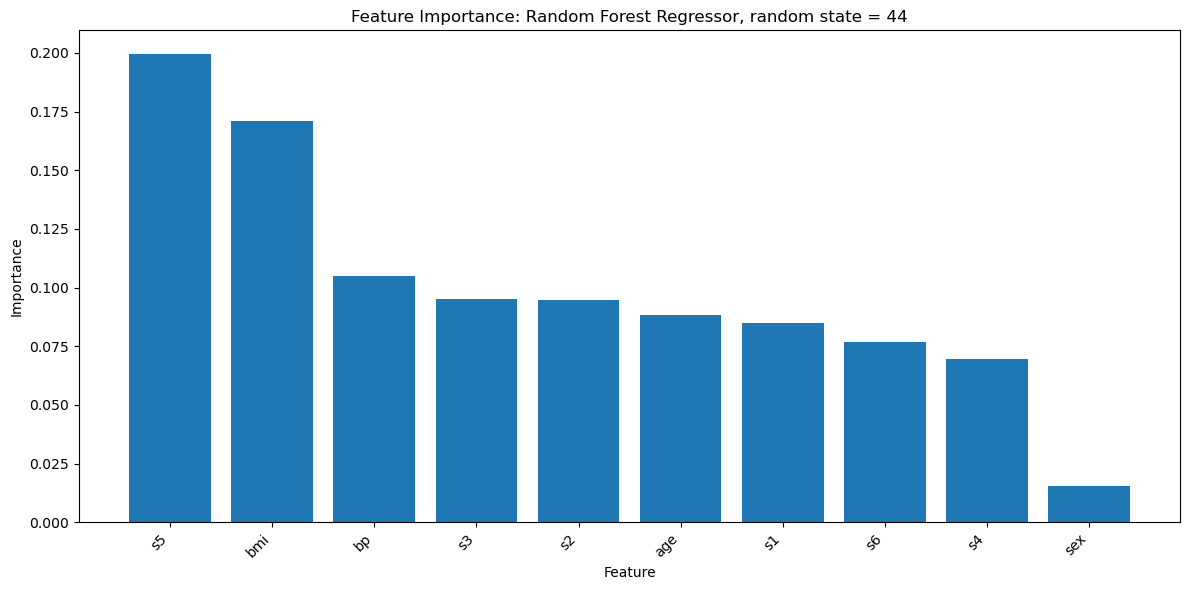

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance: Random Forest Regressor, random state = 44')
plt.tight_layout()
plt.show()


A Random Forest classifier performance depends on the data it is fed. By changing the random state, we change the set of data points that were used for training the model, and the accuracy varied (from 0.72 to 0.79). The feature importance results also changed. While the features "bmi" and "s5" were always the most important features, the model did not always choose the same feature as the most important - sometimes it was "bmi", sometimes "s5". The other, less important features also did not have the same fixed place with different training data sets. The feature importance evaluation is sensitive to the data used.

### Exercise 7

Potential problems with impurity-based feature importance methods is that they might exaggerate the importance of a feature if that feature was used to overfit the model to the data. Decision Trees are prone to overfitting, but Random Forests should mitigate this. However, it is still possible that a Random Forest overfits. If a Decision Tree or a Random Forest overfits, it will assign higher importance to the features used to overit the model, based on the training set, even if these features might in reality not be of high importance. Impurity-based featrue importance might also assign higher importance to numerical features. (https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html)